## Comparing a Simple Rails Class  x Active Record Object

#### Understanding Rails’ object hierarchy

from plain `Object` to `ActiveRecord::Base`, `ApplicationRecord`, and your `model` — to reveal how deep Rails magic really runs.

**Intro**:
Before Rails abstracts your data into elegant __model objects__, everything begins with Ruby’s __Object class__. From there, ___ActiveRecord::Base___ layers on _persistence, callbacks, and validations_. ___ApplicationRecord___ _bridges_ the gap, and your _model_ — like Post — stands at the top, ready to interact with the database. This comparison demystifies that inheritance chain and shows where the power of Rails begins.

#### 🧱 Cell 1 – Core hierarchy setup

This cell sets the foundation: from plain Ruby (Object) to _ActiveRecord::Base_ → _ApplicationRecord_ → your model _Post_.

In [1]:
# 🧩 Base of everything in Ruby
Object

# 🧠 Load ActiveRecord (ORM layer built on Ruby)
require 'active_record'

# ⚙️ Connect ActiveRecord to a SQLite database
ActiveRecord::Base.establish_connection(
  adapter:  'sqlite3',
  database: 'db/test.sqlite3'
)

# 🏗️ ApplicationRecord — your app’s base class for all models
# In Rails, this isolates app logic from ActiveRecord internals.
class ApplicationRecord < ActiveRecord::Base
  self.abstract_class = true
end

# 🧱 Post model — inherits behavior from ApplicationRecord (→ ActiveRecord → Object)
class Post < ApplicationRecord
  self.table_name = 'posts'  # explicit table name (optional)
end



"posts"

🔍 Hierarchy so far:

#### 🧮 Cell 2 – Database schema definition

Here you create the _posts_ table for _ActiveRecord_ to interact with:

In [2]:
ActiveRecord::Schema.define do
  create_table :posts, force: true do |t|
    t.string :title
    t.text   :body
    t.timestamps
  end
end


-- create_table(:posts, {force: true})
   -> 0.0044s


#### 📊 Cell 3 – Using ActiveRecord

Now test how Post behaves like a real database-backed class.

In [3]:
# Count current rows (table is empty)
puts "Posts count: #{Post.count}"

# Create one record
Post.create!(title: "Rails Hierarchy", body: "Understanding the class stack.")

# Confirm record exists
puts "Posts count after insert: #{Post.count}"


Posts count: 0
Posts count after insert: 1


#### 🧩 Cell 4 – Inspect the class hierarchy

This shows each ancestor level clearly:

In [4]:
puts "Post < ApplicationRecord ? #{Post < ApplicationRecord}"
puts "ApplicationRecord < ActiveRecord::Base ? #{ApplicationRecord < ActiveRecord::Base}"
puts "ActiveRecord::Base < Object ? #{ActiveRecord::Base < Object}"

puts "\nFull ancestor chain for Post:"
Post.ancestors.take_while { |c| c != BasicObject }


Post < ApplicationRecord ? true
ApplicationRecord < ActiveRecord::Base ? true
ActiveRecord::Base < Object ? true

Full ancestor chain for Post:


[#<Class:0x00007f67cea60148>::Post(id: integer, title: string, body: text, created_at: datetime, updated_at: datetime), #<Class:0x00007f67cea60148>::Post::GeneratedAssociationMethods, #<Class:0x00007f67cea60148>::Post::GeneratedAttributeMethods, #<Class:0x00007f67cea60148>::ApplicationRecord(abstract), #<Class:0x00007f67cea60148>::ApplicationRecord::GeneratedAssociationMethods, #<Class:0x00007f67cea60148>::ApplicationRecord::GeneratedAttributeMethods, ActiveRecord::Base, ActiveRecord::Marshalling::Methods, ActiveRecord::Normalization, ActiveRecord::Suppressor, ActiveRecord::SignedId, ActiveRecord::TokenFor, ActiveRecord::SecureToken, ActiveRecord::Store, ActiveRecord::Serialization, ActiveModel::Serializers::JSON, ActiveModel::Serialization, ActiveRecord::Reflection, ActiveRecord::NoTouching, ActiveRecord::TouchLater, ActiveRecord::Transactions, ActiveRecord::NestedAttributes, ActiveRecord::AutosaveAssociation, ActiveRecord::SecurePassword, ActiveModel::SecurePassword, ActiveRecord::As

🧬 Conceptual Layers

| Layer                            | Description                                                                       |
| -------------------------------- | --------------------------------------------------------------------------------- |
| **Object / Kernel / Basic Ruby** | Core Ruby layer – everything inherits from `Object`.                              |
| **ActiveSupport**                | Adds utility methods, callbacks, JSON encoding, and module loading.               |
| **ActiveModel**                  | Provides validation, attributes, and conversion logic shared across Rails models. |
| **ActiveRecord**                 | Adds ORM features — persistence, queries, associations, transactions, etc.        |
| **ApplicationRecord**            | Your app’s base model (abstract class). All your models inherit from it.          |
| **Post**                         | Your specific model class mapped to a database table.                             |


#### 🧍 Cell 5 – Plain Ruby example (contrast)

To compare Rails’ hierarchy with a simple Ruby class:

In [5]:
# A plain Ruby class has no DB mapping — just attributes
class Person
  attr_accessor :name, :age

  def initialize(name, age)
    @name = name
    @age  = age
  end
end


:initialize

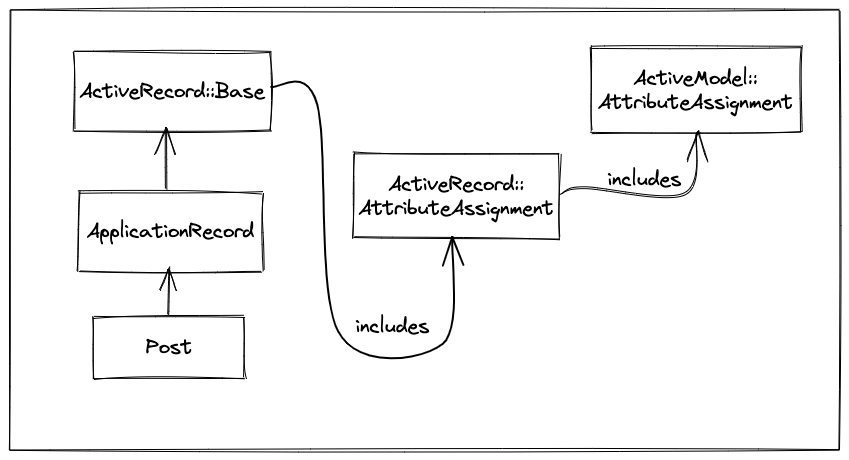!

#### 🧍‍♂️ Cell 6 – Using plain Ruby object

In [6]:
akshay = Person.new('Akshay', 31)

puts "Person name: #{akshay.name}"
puts "Person age:  #{akshay.age}"

puts "\nHierarchy for Person:"
Person.ancestors.take_while { |c| c != BasicObject }


Person name: Akshay
Person age:  31

Hierarchy for Person:


[#<Class:0x00007f67cea60148>::Person, ActiveSupport::Dependencies::RequireDependency, Object, ActiveSupport::ToJsonWithActiveSupportEncoder, ActiveSupport::Tryable, PP::ObjectMixin, JSON::Ext::Generator::GeneratorMethods::Object, Kernel]

#### Credits & References:

[Understanding the Attribute Assignment API in Rails](https://www.writesoftwarewell.com/understanding-rails-attribute-assignment/) 

In [7]:
print ("Thats it!")

Thats it!